<a href="https://colab.research.google.com/github/lelouvincx/Fundamental-ML/blob/main/NMMH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [26]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [ ]:
# prompt: google drive mount

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## load dataset here
df = pd.read_csv("/content/drive/MyDrive/NMMH/icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [ ]:
## parsing data here
images, labels = parse_data(df)


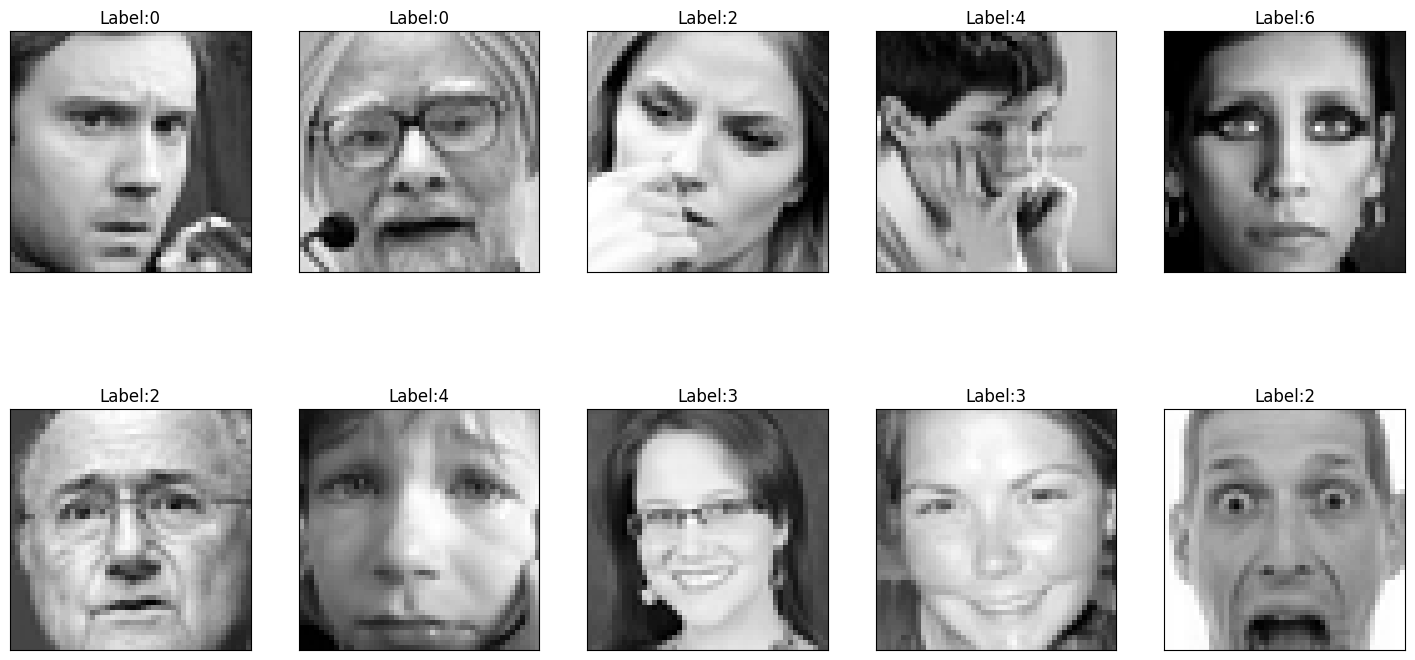

In [27]:
## showing images here
show_img(images, labels)

In [ ]:
images.shape, labels.shape

((35887, 48, 48), (35887,))

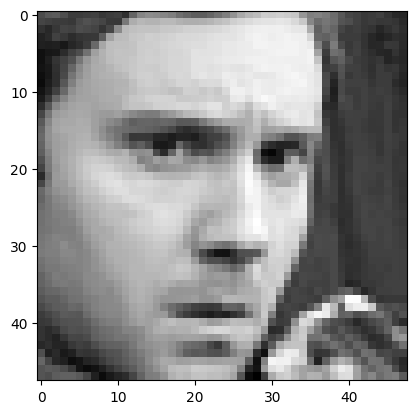

In [ ]:
plt.imshow(images[0], cmap='gray')

In [28]:
def plot_example_images(df, label: int):
    """
    Plot example images of a specific label
    """
    df = df.loc[df['emotion'] == label]
    image_array, _ = parse_data(df)
    fig, axes = plt.subplots(1, 10, figsize=(18, 9))
    for i in range(10):
        axes[i].imshow(image_array[i], cmap='gray')
        axes[i].axis('off')
    plt.show()

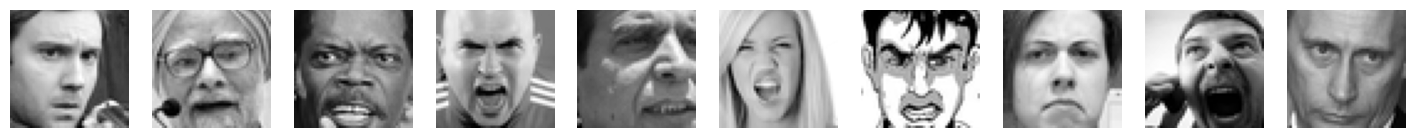

In [29]:
plot_example_images(df, label=0)

In [30]:
# Show number of images
print(f"Number of images: {len(images)}")
print(f"Number of labels: {len(np.unique(labels))}")

Number of images: 35887
Number of labels: 7


In [31]:
images.shape

(35887, 48, 48)

In [32]:
images.reshape(images.shape[0], -1).shape

(35887, 2304)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [33]:
from sklearn.decomposition import PCA


def plot_pca_single_image(pca, image):
    """
    Plot the PCA reconstruction of a single image using the provided PCA model.

    Parameters:
        - pca (PCA): The trained PCA model with specified number of components.
        - image (numpy.ndarray): The input image to be transformed and reconstructed.

    Returns:
        - numpy.ndarray: The reconstructed image using PCA.

    This function transforms the input image using the PCA model, then inversely transforms the transformed data to reconstruct the image. It plots and returns the reconstructed image.
    """
    data = pca.transform(image.reshape(1, -1)) # Transform the input image using pca
    image_pca = pca.inverse_transform(data) # Reconstruct the image using the transformed data

    plt.imshow(image_pca.reshape(48, 48), cmap='gray')
    return image_pca

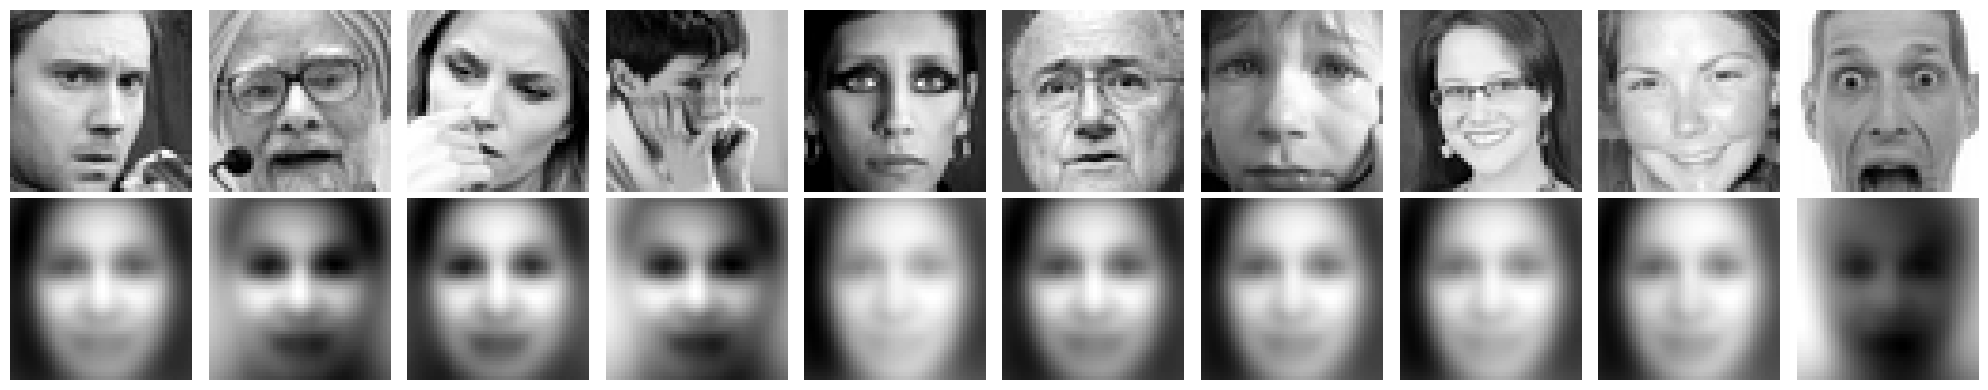

In [34]:
pca = PCA(n_components=2) # Initialize PCA with 2 components
pca.fit(images.reshape(images.shape[0], -1))
plt.figure(figsize=(20, 4))

# For the first 10 images
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    plt.subplot(2, 10, i+11)
    plot_pca_single_image(pca, images[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

In [35]:
pca = PCA()
pca.fit(images.reshape(images.shape[0], -1))

# Get the cummulative explained variance ratio
cumsum = np.cumsum(pca.explained_variance_ratio_) * 100

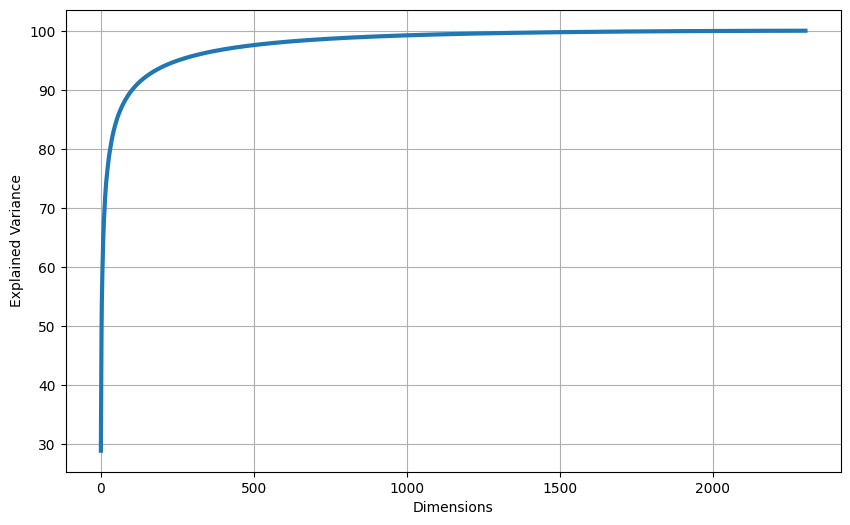

In [36]:
# Print full explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(cumsum, linewidth=3)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.grid()
plt.show()

The plot shows a steep increase in explained variance at the beginning, indicating that the first few principal components capture a significant portion of the variance in the data.

As more components are added, the increase in explained variance slows down and eventually plateaus. This indicates that additional components contribute less additional information about the data.

Choosing 90% explained variance as the threshold is reasonable because it captures most of the variance in the data while still reducing the dimensionality significantly. Also it commonly used in practice as a rule of thumb.

In [37]:
k = np.argmax(cumsum > 95)
print(f"Number of components required to explain 95% variance: {k}")

Number of components required to explain 95% variance: 254


With only 104 components, instead of 2304, can explain 90% of the variance in the data. This is a significant reduction in the data size, making it easier to analyze and visualize.

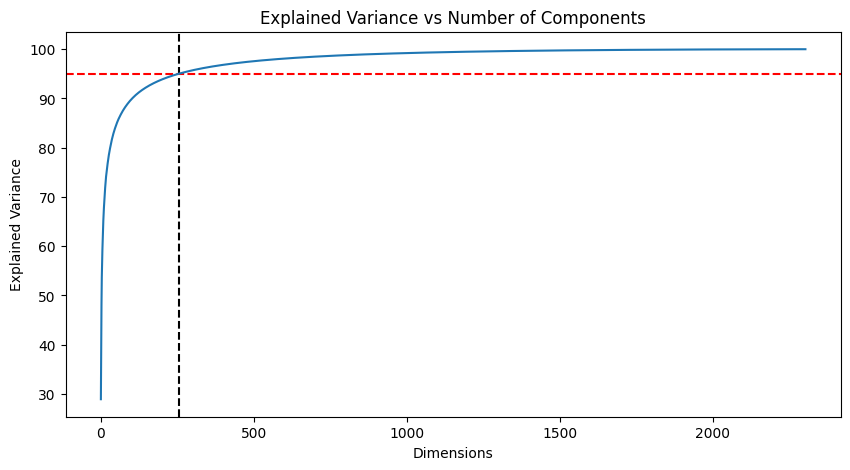

In [38]:
plt.figure(figsize=(10, 5))
plt.title("Explained Variance vs Number of Components")
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.axvline(x=k, color='k', linestyle='--')
plt.axhline(y=95, color='r', linestyle='--')
ax = plt.plot(cumsum)

Take the first image as an example, visualize different number of principal components (2, 10, 50, 100, 254, 500, 1000, 2000) and compare the reconstructed images.

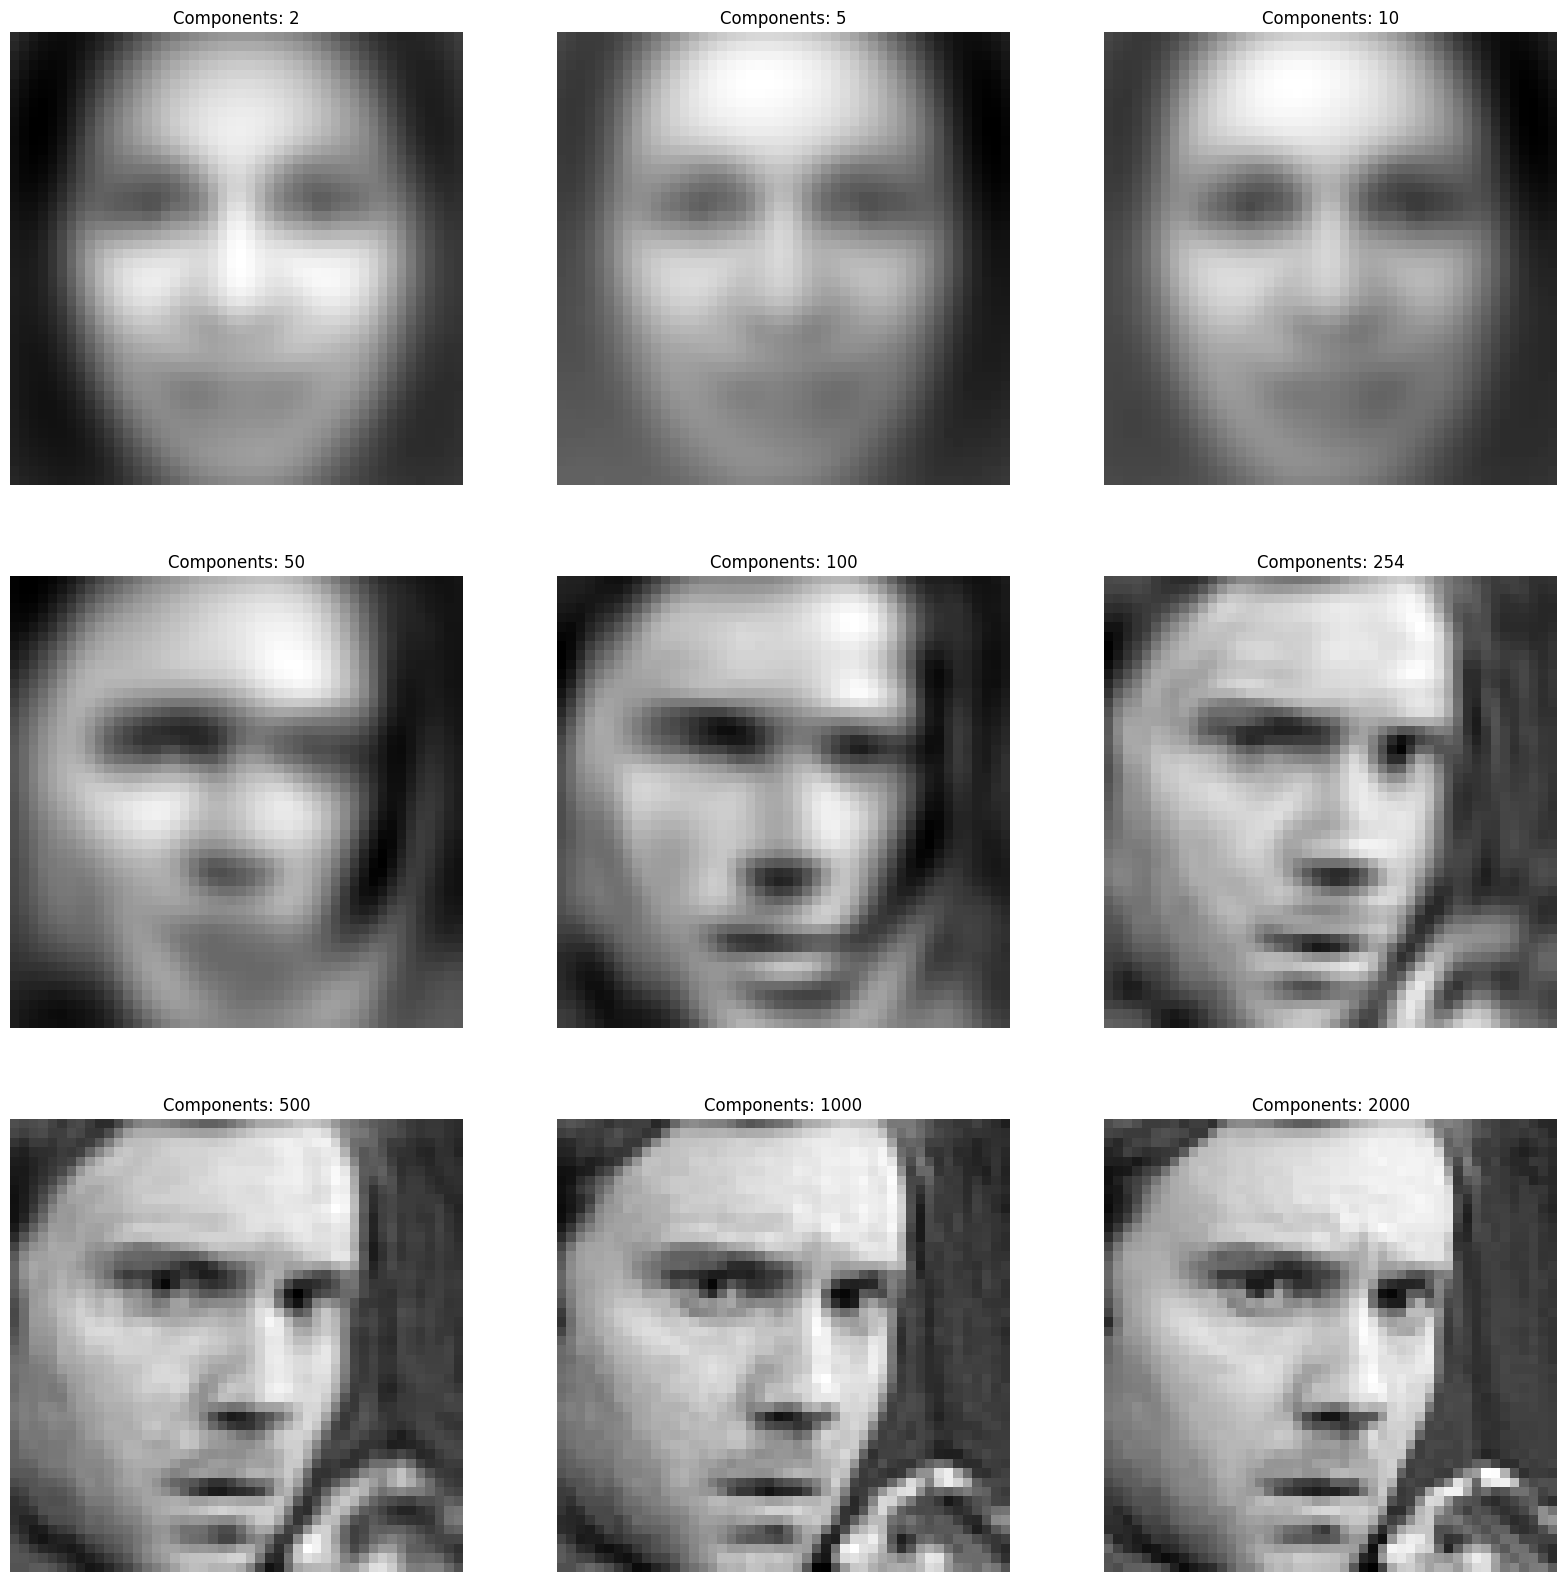

In [39]:
components = [2, 5, 10, 50, 100, 254, 500, 1000, 2000]
plt.figure(figsize=(20, 20))

for component in components:
    plt.subplot(3, 3, components.index(component)+1)
    pca = PCA(n_components=component)
    pca.fit(images.reshape(images.shape[0], -1))
    plot_pca_single_image(pca, images[0])
    plt.title("Components: {}".format(component))
    plt.axis('off')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

## Applied Normalize

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(images.reshape(images.shape[0], -1))
data_normalized.shape

(35887, 2304)

## Applied HOG Feature

In [ ]:
from skimage import color, feature, exposure
from skimage.feature import hog

def extract_hog_features(image):
    gray_image = image
    # Calculate HOG features
    hog_features, hog_image = feature.hog(gray_image, visualize=True)

    # Enhance the contrast of the HOG image for better visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    return hog_features , hog_image_rescaled

In [ ]:
hog_features_list = []
hog_images=[]
for row in data_normalized:
    image_pixels = row.reshape(48, 48)
    hog_features, hog_image = extract_hog_features(image_pixels)
    hog_features_list.append(hog_features)
    hog_images.append(hog_image)

hog_features_array = np.array(hog_features_list)

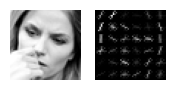

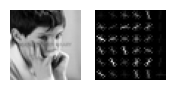

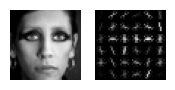

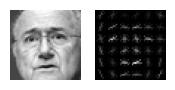

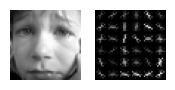

In [ ]:
for i in range(2,7):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,1), sharex=True, sharey=True)
    ax1.axis('off')
    ax1.imshow(images[i].reshape(48,48), cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.imshow(hog_images[i], cmap=plt.cm.gray)
    plt.show()

In [ ]:
def pad_hog_features(hog_features, target_size=2304):
    """Pads HOG features to a target size using zero padding.

    Args:
        hog_features (np.ndarray): The HOG features to be padded (shape (n_samples, 1296)).
        target_size (int, optional): The target size for the padded features (default 2304).

    Returns:
        np.ndarray: The padded HOG features (shape (n_samples, target_size)).
    """

    padding_size = target_size - hog_features.shape[1]
    if padding_size <= 0:
      raise ValueError("Target size must be larger than the original feature size.")

    padding_left = padding_size // 2
    padding_right = padding_size - padding_left

    padded_features = np.pad(hog_features, ((0, 0), (padding_left, padding_right)), mode='constant')
    return padded_features

In [ ]:
padded_hog = pad_hog_features(hog_features_array)
padded_hog.shape

(35887, 2304)

In [ ]:
# ValueError: hog features has 1296 features, but PCA is expecting 2304 features as input.
transformed_data = pca.transform(padded_hog)
transformed_data.shape

(35887, 2000)

## 4 models for origin data

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Add more metrics as needed
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(hog_features_array, labels, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)

In [ ]:
# Example hyperparameter grids (adjust based on algorithms)
logistic_params = {'C': [0.001, 0.01]}
random_forest_params = {'n_estimators': [10, 50]}
mlp_params = {'hidden_layer_sizes': [(100,), (100, 50, 25)],'max_iter':[10]}
knn_params = {'n_neighbors': [3, 5]}

classifiers = [
    GridSearchCV(LogisticRegression(), logistic_params),
    GridSearchCV(KNeighborsClassifier(), knn_params),
    GridSearchCV(RandomForestClassifier(), random_forest_params),
    GridSearchCV(MLPClassifier(), mlp_params)
]

algorithm_names = ["Logistic Regression", "KNN", "Random Forest", "MLP"]


In [ ]:
from tqdm import tqdm

clf_store = {
    "Logistic Regression": None,
    "KNN": None,
    "Random Forest": None,
    "MLP": None
}

for i, clf in tqdm(enumerate(classifiers)):
    print(f"Training {algorithm_names[i]}...")
    clf.fit(X_train, y_train)

    print(f"Evaluating {algorithm_names[i]}...")
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Adjust 'average' as needed
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    clf_store[algorithm_names[i]] = clf

0it [00:00, ?it/s]

Training Logistic Regression...


1it [02:26, 146.79s/it]

Evaluating Logistic Regression...
Accuracy: 0.4304, Precision: 0.4034, Recall: 0.4304, F1-Score: 0.3995
Training KNN...
Evaluating KNN...


2it [04:04, 117.80s/it]

Accuracy: 0.4490, Precision: 0.4368, Recall: 0.4490, F1-Score: 0.4344
Training Random Forest...
Evaluating Random Forest...


3it [09:31, 213.42s/it]

Accuracy: 0.4390, Precision: 0.4402, Recall: 0.4390, F1-Score: 0.4190
Training MLP...


4it [11:26, 171.58s/it]

Evaluating MLP...
Accuracy: 0.4569, Precision: 0.4528, Recall: 0.4569, F1-Score: 0.4412


## 4 models for PCA/transformed data

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Add more metrics as needed
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_data, labels, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)

In [ ]:
# Example hyperparameter grids (adjust based on algorithms)
logistic_params = {'C': [0.001, 0.01]}
random_forest_params = {'n_estimators': [10, 50]}
mlp_params = {'hidden_layer_sizes': [(100,), (100, 50, 25)],'max_iter':[10]}
knn_params = {'n_neighbors': [3, 5]}

classifiers = [
    GridSearchCV(LogisticRegression(), logistic_params),
    GridSearchCV(KNeighborsClassifier(), knn_params),
    GridSearchCV(RandomForestClassifier(), random_forest_params),
    GridSearchCV(MLPClassifier(), mlp_params)
]

algorithm_names = ["Logistic Regression", "KNN", "Random Forest", "MLP"]


In [ ]:
clf_store_trans = {
    "Logistic Regression": None,
    "KNN": None,
    "Random Forest": None,
    "MLP": None
}

for i, clf in tqdm(enumerate(classifiers)):
    print(f"Training {algorithm_names[i]}...")
    clf.fit(X_train, y_train)

    print(f"Evaluating {algorithm_names[i]}...")
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Adjust 'average' as needed
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    clf_store_trans[algorithm_names[i]] = clf

0it [00:00, ?it/s]

Training Logistic Regression...


1it [02:08, 128.92s/it]

Evaluating Logistic Regression...
Accuracy: 0.3928, Precision: 0.3753, Recall: 0.3928, F1-Score: 0.3521
Training KNN...
Evaluating KNN...


2it [04:36, 139.74s/it]

Accuracy: 0.4492, Precision: 0.4360, Recall: 0.4492, F1-Score: 0.4346
Training Random Forest...
Evaluating Random Forest...


3it [11:32, 265.78s/it]

Accuracy: 0.4292, Precision: 0.4336, Recall: 0.4292, F1-Score: 0.4083
Training MLP...


4it [14:19, 214.95s/it]

Evaluating MLP...
Accuracy: 0.2916, Precision: 0.3326, Recall: 0.2916, F1-Score: 0.1890


To compare the performance of the models trained on the original data versus the transformed data, let's analyze and contrast their evaluation metrics: accuracy, precision, recall, and F1-score.

### Performance on Original Data:
- **Logistic Regression**:
  - Accuracy: 0.4304
  - Precision: 0.4034
  - Recall: 0.4304
  - F1-Score: 0.3995
- **KNN**:
  - Accuracy: 0.4490
  - Precision: 0.4368
  - Recall: 0.4490
  - F1-Score: 0.4344
- **Random Forest**:
  - Accuracy: 0.4390
  - Precision: 0.4402
  - Recall: 0.4390
  - F1-Score: 0.4190
- **MLP**:
  - Accuracy: 0.4569
  - Precision: 0.4528
  - Recall: 0.4569
  - F1-Score: 0.4412

### Performance on Transformed Data:
- **Logistic Regression**:
  - Accuracy: 0.3928
  - Precision: 0.3753
  - Recall: 0.3928
  - F1-Score: 0.3521
- **KNN**:
  - Accuracy: 0.4492
  - Precision: 0.4360
  - Recall: 0.4492
  - F1-Score: 0.4346
- **Random Forest**:
  - Accuracy: 0.4292
  - Precision: 0.4336
  - Recall: 0.4292
  - F1-Score: 0.4083
- **MLP**:
  - Accuracy: 0.2916
  - Precision: 0.3326
  - Recall: 0.2916
  - F1-Score: 0.1890

### Comparison:

#### Logistic Regression:
- **Original Data**: Better performance across all metrics compared to transformed data.
  - Accuracy: 0.4304 vs. 0.3928
  - Precision: 0.4034 vs. 0.3753
  - Recall: 0.4304 vs. 0.3928
  - F1-Score: 0.3995 vs. 0.3521

#### KNN:
- **Transformed Data**: Slightly better performance in accuracy and F1-score, but very close in all metrics.
  - Accuracy: 0.4492 vs. 0.4490
  - Precision: 0.4360 vs. 0.4368
  - Recall: 0.4492 vs. 0.4490
  - F1-Score: 0.4346 vs. 0.4344

#### Random Forest:
- **Original Data**: Better performance across all metrics compared to transformed data.
  - Accuracy: 0.4390 vs. 0.4292
  - Precision: 0.4402 vs. 0.4336
  - Recall: 0.4390 vs. 0.4292
  - F1-Score: 0.4190 vs. 0.4083

#### MLP:
- **Original Data**: Significantly better performance across all metrics compared to transformed data.
  - Accuracy: 0.4569 vs. 0.2916
  - Precision: 0.4528 vs. 0.3326
  - Recall: 0.4569 vs. 0.2916
  - F1-Score: 0.4412 vs. 0.1890

### Summary:
- **Logistic Regression and Random Forest** models perform better with the original data across all metrics.
- **KNN** shows almost identical performance on both datasets, with a slight edge in accuracy and F1-score on transformed data.
- **MLP** performs significantly better on the original data.

### Best Model Overall:
- **MLP** trained on original data achieves the highest accuracy (0.4569), precision (0.4528), recall (0.4569), and F1-score (0.4412).

In conclusion, the MLP model trained on the original data performs best overall, and models generally perform better on the original data compared to the transformed data.

## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

for name,clf in clf_store_trans.items():
  # Get predictions for the test set using the trained model
  y_pred = clf.predict(X_test)

  # Create confusion matrix
  cm = confusion_matrix(y_test, y_pred)

  # Print the confusion matrix
  print(f"\nConfusion Matrix for {name}:")
  print(cm)

  # Generate classification report
  report = classification_report(y_test, y_pred)

  # Print the classification report
  print(f"\nClassification Report for {name}:")
  print(report)



Confusion Matrix for Logistic Regression:
[[  78    0   36  255  208   39  175]
 [  10    0    0   32   24    4   21]
 [  32    0   70  290  208   96  173]
 [  13    0   26 1135  198   24   78]
 [  31    0   46  291  370   16  221]
 [  15    0   38  153   90  237  135]
 [  29    0   36  279  249   25  436]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.38      0.10      0.16       791
           1       0.00      0.00      0.00        91
           2       0.28      0.08      0.12       869
           3       0.47      0.77      0.58      1474
           4       0.27      0.38      0.32       975
           5       0.54      0.35      0.43       668
           6       0.35      0.41      0.38      1054

    accuracy                           0.39      5922
   macro avg       0.33      0.30      0.28      5922
weighted avg       0.38      0.39      0.35      5922


Confusion Matrix for KNN:
[[ 277    3   92  

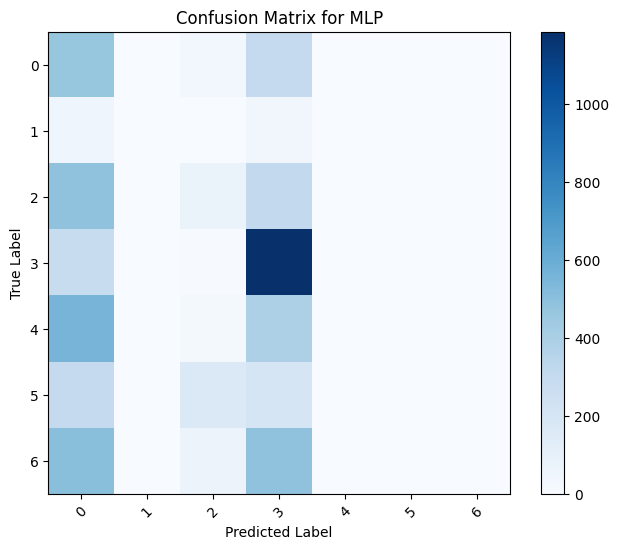

In [ ]:
# Create a heatmap of the confusion matrix
y_pred = clf_store_trans['MLP'].predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(range(len(np.unique(y_test))), np.unique(y_test), rotation=45)
plt.yticks(range(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for {algorithm_names[i]}')
plt.grid(False)
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

def analyze_model_performance(y_test, y_pred, class_names):
    """
    Analyzes the confusion matrix and classification report to identify emotion categories
    where the model makes the most accurate and most error-prone predictions.

    Args:
        y_test (array-like): True labels for the test set.
        y_pred (array-like): Predicted labels by the model for the test set.
        class_names (list): List of emotion category names.

    Returns:
        tuple: A tuple containing two dictionarys:
            - most_accurate: Emotion category with highest accuracy.
            - most_errors: Emotion category with the most misclassifications.
    """

    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)

    most_accurate = {}
    most_errors = {}

    # Find category with highest accuracy (diagonal element)
    highest_accuracy = np.max(cm.diagonal())
    for i, class_name in enumerate(class_names):
        if cm[i, i] == highest_accuracy:
            most_accurate['category'] = class_name
            most_accurate['accuracy'] = highest_accuracy / np.sum(cm[i, :])
            most_accurate['precision'] = report[class_name]['precision']
            most_accurate['recall'] = report[class_name]['recall']
            break  # Stop iterating after finding the first occurrence

    # Find category with the most misclassifications (sum of off-diagonal elements in its row)
    most_errors['category'] = class_names[0]  # Initialize with first category
    most_errors['count'] = 0
    for i in range(len(cm)):
        row_sum = np.sum(cm[i, :]) - cm[i, i]  # Exclude diagonal element
        if row_sum > most_errors['count']:
            most_errors['category'] = class_names[i]
            most_errors['count'] = row_sum

    return most_accurate, most_errors

y_pred = clf_store_trans['MLP'].predict(X_test)
class_names = np.unique(y_test)  # Assuming class labels are used directly

most_accurate, most_errors = analyze_model_performance(y_test, y_pred, class_names)

print(f"Emotion category with the most accurate predictions:")
print(most_accurate)

print(f"\nEmotion category with the most misclassifications:")
print(most_errors)


Emotion category with the most accurate predictions:
{'category': 3, 'accuracy': 0.8046132971506106, 'precision': 0.4079807361541108, 'recall': 0.8046132971506106}

Emotion category with the most misclassifications:
{'category': 6, 'count': 1053}


To compare the performance of the classification models (Logistic Regression, KNN, Random Forest, and MLP), let's analyze their evaluation metrics: accuracy, precision, recall, and F1-score.

### Accuracy
- **Logistic Regression**: 0.39
- **KNN**: 0.45
- **Random Forest**: 0.43
- **MLP**: 0.29

### Macro Average Precision:
- **Logistic Regression**: 0.33
- **KNN**: 0.43
- **Random Forest**: 0.51
- **MLP**: 0.26

### Macro Average Recall:
- **Logistic Regression**: 0.30
- **KNN**: 0.42
- **Random Forest**: 0.37
- **MLP**: 0.21

### Macro Average F1-score:
- **Logistic Regression**: 0.28
- **KNN**: 0.42
- **Random Forest**: 0.39
- **MLP**: 0.13

### Weighted Average Precision:
- **Logistic Regression**: 0.38
- **KNN**: 0.44
- **Random Forest**: 0.43
- **MLP**: 0.33

### Weighted Average Recall:
- **Logistic Regression**: 0.39
- **KNN**: 0.45
- **Random Forest**: 0.43
- **MLP**: 0.29

### Weighted Average F1-score:
- **Logistic Regression**: 0.35
- **KNN**: 0.43
- **Random Forest**: 0.41
- **MLP**: 0.19

### Analysis:
- **Accuracy**: KNN has the highest accuracy (0.45), indicating it correctly classifies the most samples overall.
- **Macro Average Precision**: Random Forest has the highest precision (0.51), suggesting it is better at minimizing false positives across all classes.
- **Macro Average Recall**: KNN has the highest recall (0.42), showing it captures true positives well across all classes.
- **Macro Average F1-score**: KNN has the highest F1-score (0.42), indicating the best balance between precision and recall for all classes.
- **Weighted Average Precision, Recall, and F1-score**: KNN consistently has the highest values across these metrics, reinforcing its superior performance.

### Conclusion:
Based on the evaluation metrics, **KNN (K-Nearest Neighbors)** performs the best overall. It has the highest accuracy, recall, and F1-score. This indicates that KNN balances true positives and false positives effectively, making it the most reliable model among the four tested for this specific dataset. Random Forest has the highest precision but lower recall and F1-score, indicating it is more conservative but misses more true positives. MLP has the lowest performance across all metrics, suggesting it is not suitable for this dataset.